## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

## Dataset

In [2]:
df = pd.read_csv('Heart_Disease_Prediction.csv')

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## Data contains:

* Age - age in years
* Sex - (1 = male; 0 = female)
* Chest pain type - chest pain type
* BP - resting blood pressure (in mm Hg on admission to the hospital)
* Cholestrol - serum cholestoral in mg/dl
* FBS - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* EKG results - resting electrocardiographic results
* Max HR - maximum heart rate achieved
* Exercise angina - exercise induced angina (1 = yes; 0 = no)
* ST depression - ST depression induced by exercise relative to rest
* Slope of ST - the slope of the peak exercise ST segment
* Number of vessels fluro - number of major vessels (0-3) colored by flourosopy
* Thallium - 3 = normal; 6 = fixed defect; 7 = reversable defect
* Heart Disease - have disease or not (1=yes, 0=no)

## Data Exploration

In [4]:
print("This dataset has\nRows: {}\nColumns: {}".format(df.shape[0],df.shape[1]))

This dataset has
Rows: 270
Columns: 14


In [5]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [7]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [8]:
df.isnull()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,False,False,False,False,False,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,False,False,False,False
267,False,False,False,False,False,False,False,False,False,False,False,False,False,False
268,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
print(df.isnull().sum())
print("------------------------")
print("Total             {}".format(df.isnull().sum().sum()))

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64
------------------------
Total             0


In [10]:
#checking if dataset has any duplicate rows
df.duplicated().sum()

0

In [11]:
# Checking for any correlations.
df.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


In [12]:
df["Heart Disease"].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

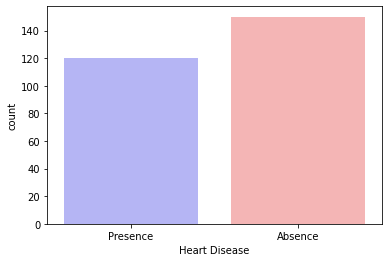

In [13]:
sns.countplot(x="Heart Disease", data=df, palette="bwr")
plt.show()

In [14]:
countNoDisease = len(df[df['Heart Disease'] == 'Absence'])
countHaveDisease = len(df[df['Heart Disease'] == 'Presence'])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df["Heart Disease"]))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df["Heart Disease"]))*100)))

Percentage of Patients Haven't Heart Disease: 55.56%
Percentage of Patients Have Heart Disease: 44.44%


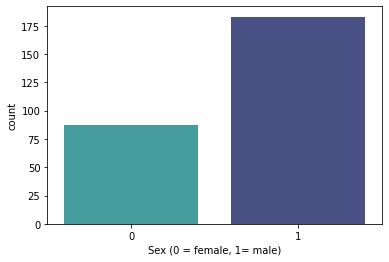

In [15]:
sns.countplot(x='Sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [16]:
countFemale = len(df[df.Sex == 0])
countMale = len(df[df.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.Sex))*100)))

Percentage of Female Patients: 32.22%
Percentage of Male Patients: 67.78%


In [17]:
df.groupby('Heart Disease').mean()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Heart Disease,,,,,,,,,,,,,
Absence,52.706667,0.553333,2.820000,128.866667,244.213333,0.153333,0.860,158.333333,0.153333,0.622667,1.400000,0.286667,3.786667
Presence,56.591667,0.833333,3.616667,134.441667,256.466667,0.141667,1.225,138.858333,0.550000,1.584167,1.816667,1.150000,5.833333


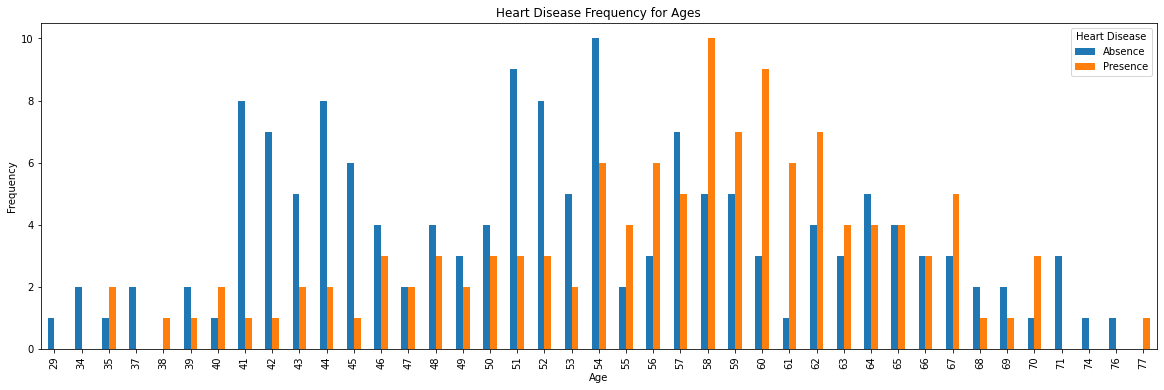

In [18]:
pd.crosstab(df.Age,df['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

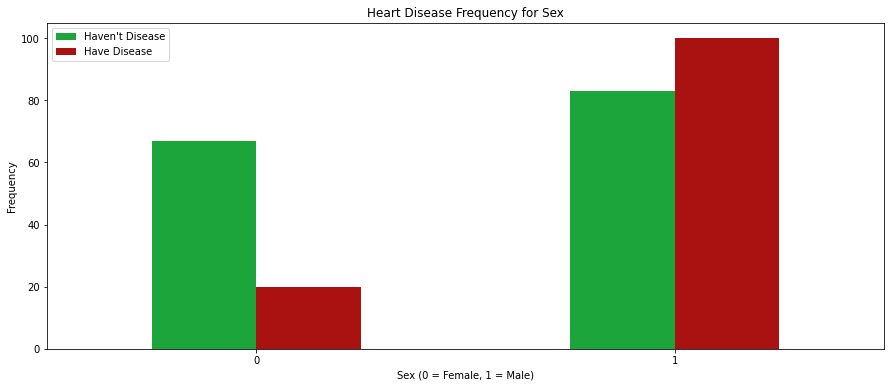

In [19]:
pd.crosstab(df.Sex,df['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

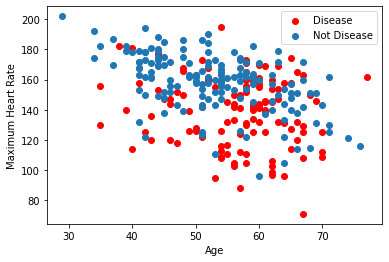

In [20]:
plt.scatter(x=df.Age[df['Heart Disease']=='Presence'], y=df['Max HR'][(df['Heart Disease']=='Presence')], c="red")
plt.scatter(x=df.Age[df['Heart Disease']=='Absence'], y=df['Max HR'][(df['Heart Disease']=='Absence')])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

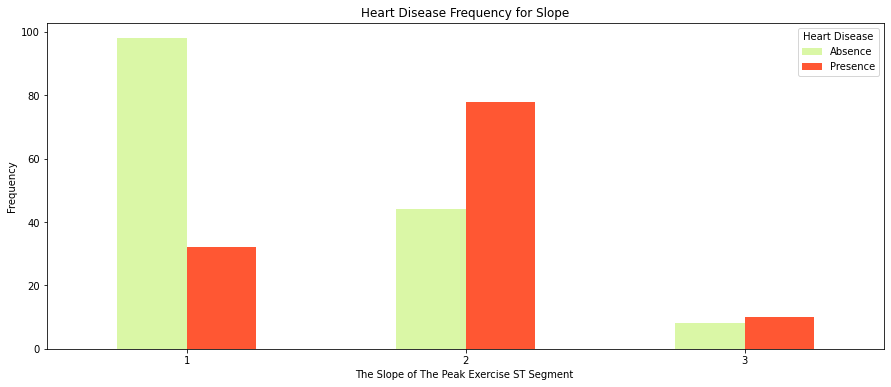

In [21]:
pd.crosstab(df['Slope of ST'],df['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

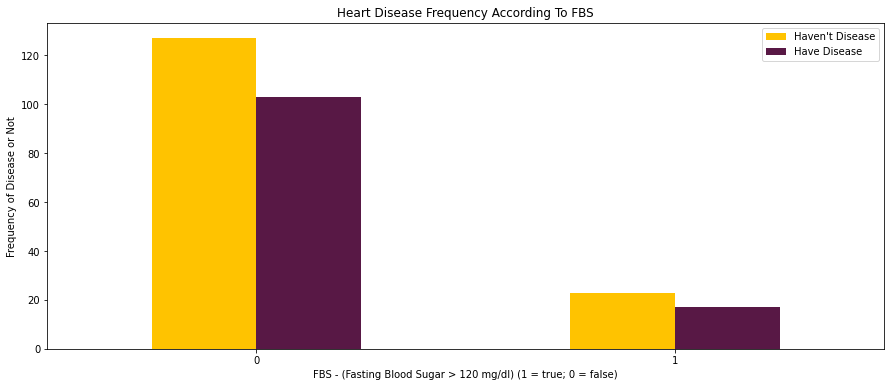

In [22]:
pd.crosstab(df['FBS over 120'],df['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

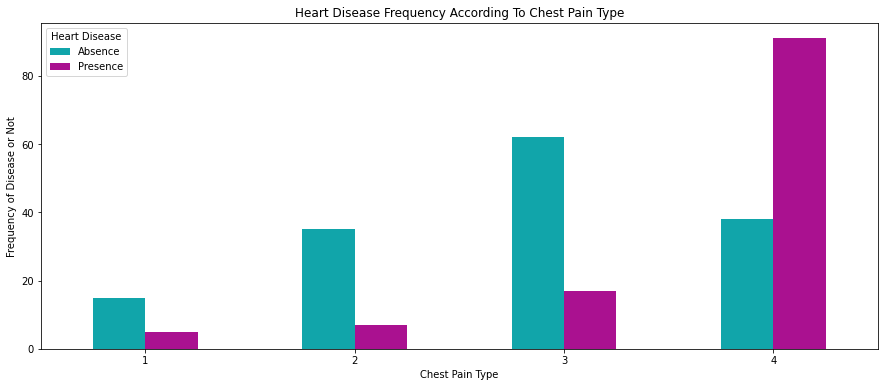

In [23]:
pd.crosstab(df['Chest pain type'],df['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

## Creating Dummy Variables

Since 'Chest pain type', 'Thallium' and 'Slope of ST' are categorical variables we'll turn them into dummy variables.

In [24]:
a = pd.get_dummies(df['Chest pain type'], prefix = "Chest pain type")
b = pd.get_dummies(df['Thallium'], prefix = "Thallium")
c = pd.get_dummies(df['Slope of ST'], prefix = "Slope of ST")

In [25]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,...,Chest pain type_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,Thallium_3,Thallium_6,Thallium_7,Slope of ST_1,Slope of ST_2,Slope of ST_3
0,70,1,4,130,322,0,2,109,0,2.4,...,0,0,0,1,1,0,0,0,1,0
1,67,0,3,115,564,0,2,160,0,1.6,...,0,0,1,0,0,0,1,0,1,0
2,57,1,2,124,261,0,0,141,0,0.3,...,0,1,0,0,0,0,1,1,0,0
3,64,1,4,128,263,0,0,105,1,0.2,...,0,0,0,1,0,0,1,0,1,0
4,74,0,2,120,269,0,2,121,1,0.2,...,0,1,0,0,1,0,0,1,0,0


In [26]:
df = df.drop(columns = ['Chest pain type', 'Thallium', 'Slope of ST'])
df.head()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,Chest pain type_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,Thallium_3,Thallium_6,Thallium_7,Slope of ST_1,Slope of ST_2,Slope of ST_3
0,70,1,130,322,0,2,109,0,2.4,3,...,0,0,0,1,1,0,0,0,1,0
1,67,0,115,564,0,2,160,0,1.6,0,...,0,0,1,0,0,0,1,0,1,0
2,57,1,124,261,0,0,141,0,0.3,0,...,0,1,0,0,0,0,1,1,0,0
3,64,1,128,263,0,0,105,1,0.2,1,...,0,0,0,1,0,0,1,0,1,0
4,74,0,120,269,0,2,121,1,0.2,1,...,0,1,0,0,1,0,0,1,0,0


In [27]:
y = df['Heart Disease'].values
x_data = df.drop(['Heart Disease'], axis = 1)

In [28]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [30]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [31]:
accuracies = {}

# K-Nearest Neighbour (KNN) Classification

In [32]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k

In [33]:
# We will split our data. 80% of our data will be train data and 20% of it will be test data.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 72.22%


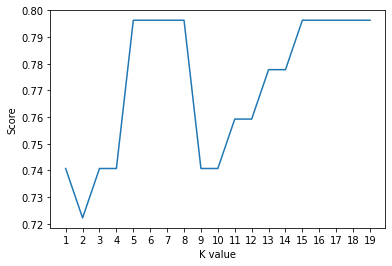

Maximum KNN Score is 79.63%


In [34]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

As you can see above if we define k as 5-6-7-8-15-16-- we will reach maximum score.

KNN Model's Accuracy is 79.63%

# Naive Bayes Algorithm

In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 68.52%


Accuracy of Naive Bayes: 68.52%

# Decision Tree Algorithm

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 81.48%


## Comparing Models

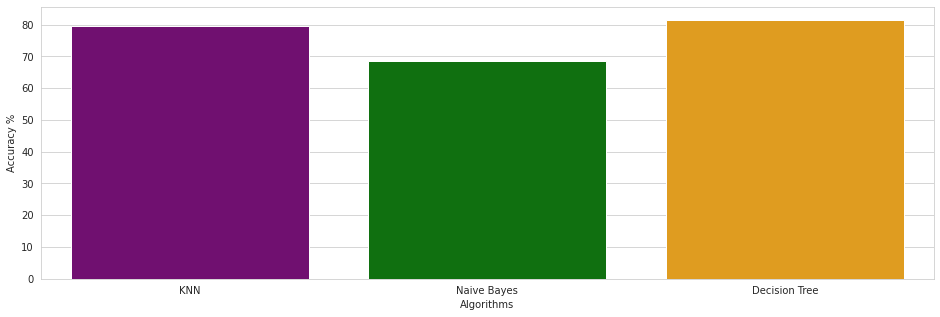

In [37]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

Our models work fine but best of them is Decision Tree with 81.48% of accuracy. Let's look their confusion matrixes.

# Confusion Matrix

In [38]:
# Predicted values
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train, y_train)
y_head_knn = knn3.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_dtc = dtc.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report

cm_knn = confusion_matrix(y_test,y_head_knn)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)

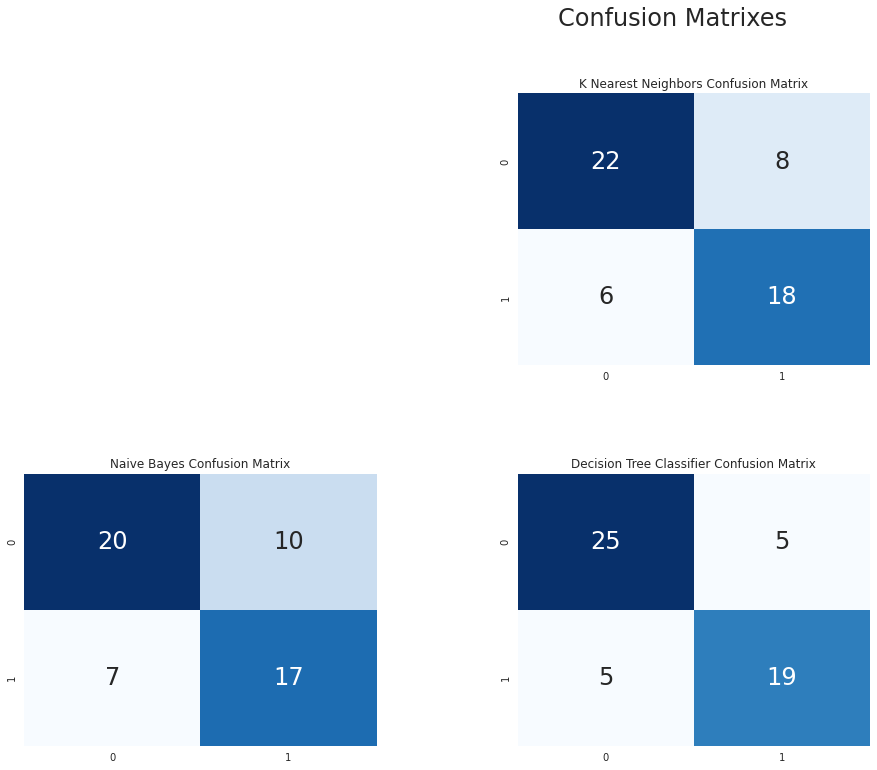

In [40]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()


### For K-Nearest Neighbour (KNN) Classification

In [41]:
print(classification_report(y_test,y_head_knn))

              precision    recall  f1-score   support

     Absence       0.79      0.73      0.76        30
    Presence       0.69      0.75      0.72        24

    accuracy                           0.74        54
   macro avg       0.74      0.74      0.74        54
weighted avg       0.74      0.74      0.74        54



### For Naive Bayes Algorithm

In [42]:
print(classification_report(y_test,y_head_nb))

              precision    recall  f1-score   support

     Absence       0.74      0.67      0.70        30
    Presence       0.63      0.71      0.67        24

    accuracy                           0.69        54
   macro avg       0.69      0.69      0.68        54
weighted avg       0.69      0.69      0.69        54



### For Decision Tree Algorithm

In [43]:
print(classification_report(y_test,y_head_dtc))

              precision    recall  f1-score   support

     Absence       0.83      0.83      0.83        30
    Presence       0.79      0.79      0.79        24

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54

